In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [9]:
data = load_linnerud()
df_features = data.feature_names

In [10]:
df_data = pd.DataFrame(data.data, columns = df_features)

In [11]:
df = pd.concat([pd.DataFrame(data.data, columns = data.feature_names), pd.DataFrame(data.target, columns = data.target_names)], axis =1)

In [12]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


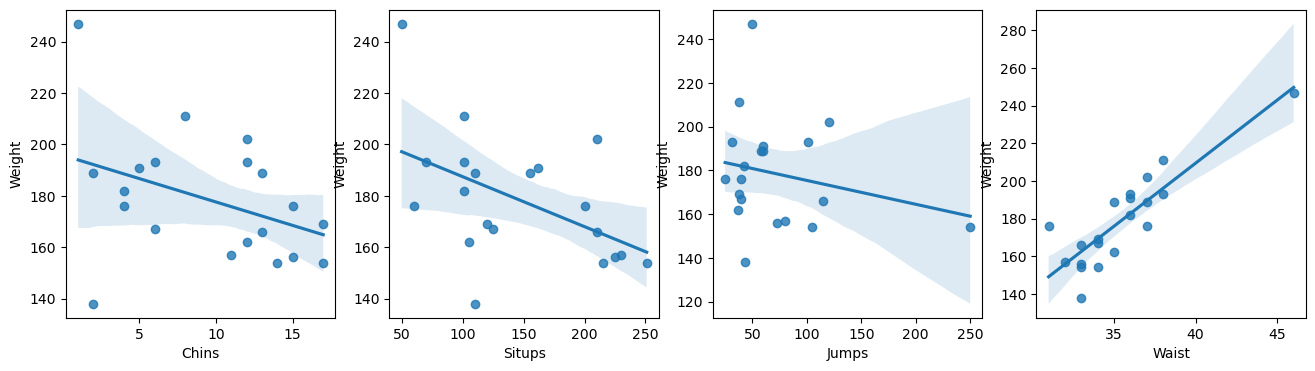

In [6]:
fig, axs = plt.subplots(figsize=(16,4), ncols=4, nrows=1)

lm_features = ['Chins','Situps','Jumps','Waist']

for i, feature in enumerate(lm_features):
    col = i

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Weight', data=df, ax=axs[col])

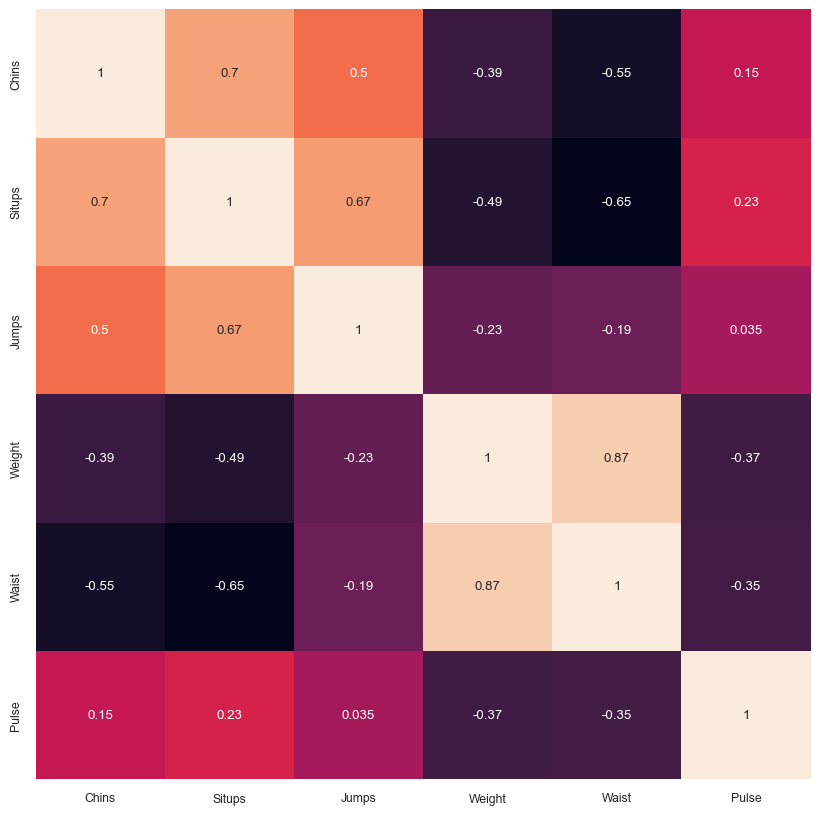

In [7]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [8]:
print('Invalid values in train = {}'.format(df.isnull().values.sum()))

Invalid values in train = 0


In [13]:
X_data = df.drop(['Pulse'], axis = 1)
y_data = df['Pulse']

In [15]:
X_data.head()

,Chins,Situps,Jumps,Weight,Waist
0,5.0,162.0,60.0,191.0,36.0
1,2.0,110.0,60.0,189.0,37.0
2,12.0,101.0,101.0,193.0,38.0
3,12.0,105.0,37.0,162.0,35.0
4,13.0,155.0,58.0,189.0,35.0


In [16]:
X_data = df_data.to_numpy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [20]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (12, 3)
y train : (12,)
X test : (4, 3)
y test : (4,)
X val : (4, 3)
y val : (4,)


In [21]:
# Defining the model 
from keras import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
inputs = Input(shape = (3,))

x = Dense(16,activation='relu')(inputs)
#x2 = Dense(16,activation='relu')(x)
x3 = Dense(16,activation='relu')(x)
outputs = Dense(1)(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile('rmsprop',
             loss = "mse",metrics=["mae"]
             )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [22]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs= 300, batch_size = 3 ,validation_data= (X_val,y_val))

Epoch 1/300
4/4 [==============================] - 1s 65ms/step - loss: 863.5677 - mae: 23.2301 - val_loss: 512.1568 - val_mae: 21.3476
Epoch 2/300
4/4 [==============================] - 0s 14ms/step - loss: 528.4748 - mae: 18.3205 - val_loss: 479.2805 - val_mae: 21.5409
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 408.5905 - mae: 16.2388 - val_loss: 477.3790 - val_mae: 21.6834
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 347.7325 - mae: 15.8063 - val_loss: 488.0586 - val_mae: 21.7822
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 327.9981 - mae: 15.6913 - val_loss: 502.8972 - val_mae: 21.8513
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 305.1040 - mae: 15.6803 - val_loss: 508.1848 - val_mae: 21.8591
Epoch 7/300
4/4 [==============================] - 0s 16ms/step - loss: 285.5464 - mae: 14.9884 - val_loss: 519.0546 - val_mae: 21.8835
Epoch 8/300
4/4 [==============================]

Epoch 61/300
4/4 [==============================] - 0s 13ms/step - loss: 226.8785 - mae: 12.3347 - val_loss: 548.5087 - val_mae: 20.9290
Epoch 62/300
4/4 [==============================] - 0s 19ms/step - loss: 235.0570 - mae: 12.3812 - val_loss: 523.3314 - val_mae: 20.8394
Epoch 63/300
4/4 [==============================] - 0s 16ms/step - loss: 246.2467 - mae: 13.1671 - val_loss: 546.9833 - val_mae: 20.9030
Epoch 64/300
4/4 [==============================] - 0s 12ms/step - loss: 236.8107 - mae: 12.5269 - val_loss: 555.2037 - val_mae: 20.8827
Epoch 65/300
4/4 [==============================] - 0s 14ms/step - loss: 228.8196 - mae: 12.2670 - val_loss: 541.1133 - val_mae: 20.8341
Epoch 66/300
4/4 [==============================] - 0s 13ms/step - loss: 231.8073 - mae: 12.6768 - val_loss: 559.5868 - val_mae: 20.8817
Epoch 67/300
4/4 [==============================] - 0s 18ms/step - loss: 235.5074 - mae: 12.3821 - val_loss: 537.3769 - val_mae: 20.7813
Epoch 68/300
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 229.3621 - mae: 12.6798 - val_loss: 534.0417 - val_mae: 20.0517
Epoch 121/300
4/4 [==============================] - 0s 12ms/step - loss: 223.3557 - mae: 11.9654 - val_loss: 538.3670 - val_mae: 20.0274
Epoch 122/300
4/4 [==============================] - 0s 14ms/step - loss: 215.2010 - mae: 11.4107 - val_loss: 514.0719 - val_mae: 19.9666
Epoch 123/300
4/4 [==============================] - 0s 12ms/step - loss: 221.3898 - mae: 11.5362 - val_loss: 496.0327 - val_mae: 19.8695
Epoch 124/300
4/4 [==============================] - 0s 12ms/step - loss: 219.4763 - mae: 11.7644 - val_loss: 504.8484 - val_mae: 19.9316
Epoch 125/300
4/4 [==============================] - 0s 17ms/step - loss: 238.4649 - mae: 13.0590 - val_loss: 514.5847 - val_mae: 19.8890
Epoch 126/300
4/4 [==============================] - 0s 13ms/step - loss: 220.0714 - mae: 11.9776 - val_loss: 530.2850 - val_mae: 19.9585
Epoch 127/300
4/4 [=============================

4/4 [==============================] - 0s 13ms/step - loss: 210.2822 - mae: 11.5703 - val_loss: 480.9450 - val_mae: 19.3305
Epoch 180/300
4/4 [==============================] - 0s 15ms/step - loss: 218.4142 - mae: 11.7898 - val_loss: 492.9749 - val_mae: 19.4613
Epoch 181/300
4/4 [==============================] - 0s 14ms/step - loss: 230.2502 - mae: 12.1421 - val_loss: 492.3181 - val_mae: 19.3978
Epoch 182/300
4/4 [==============================] - 0s 13ms/step - loss: 211.4343 - mae: 10.9232 - val_loss: 473.4567 - val_mae: 19.3206
Epoch 183/300
4/4 [==============================] - 0s 11ms/step - loss: 217.7223 - mae: 12.0479 - val_loss: 502.7599 - val_mae: 19.4165
Epoch 184/300
4/4 [==============================] - 0s 14ms/step - loss: 217.2563 - mae: 11.6549 - val_loss: 484.1606 - val_mae: 19.2722
Epoch 185/300
4/4 [==============================] - 0s 14ms/step - loss: 209.7796 - mae: 11.2511 - val_loss: 465.4186 - val_mae: 19.2237
Epoch 186/300
4/4 [=============================

4/4 [==============================] - 0s 15ms/step - loss: 229.0434 - mae: 12.4695 - val_loss: 477.6600 - val_mae: 18.9559
Epoch 239/300
4/4 [==============================] - 0s 19ms/step - loss: 220.9645 - mae: 12.1473 - val_loss: 482.5733 - val_mae: 18.9558
Epoch 240/300
4/4 [==============================] - 0s 18ms/step - loss: 207.7084 - mae: 11.2510 - val_loss: 473.1105 - val_mae: 18.9219
Epoch 241/300
4/4 [==============================] - 0s 16ms/step - loss: 211.8880 - mae: 11.2752 - val_loss: 450.2186 - val_mae: 18.7696
Epoch 242/300
4/4 [==============================] - 0s 16ms/step - loss: 201.9647 - mae: 11.5937 - val_loss: 465.0420 - val_mae: 18.8199
Epoch 243/300
4/4 [==============================] - 0s 15ms/step - loss: 207.2643 - mae: 11.3738 - val_loss: 459.2284 - val_mae: 18.8529
Epoch 244/300
4/4 [==============================] - 0s 15ms/step - loss: 214.9831 - mae: 11.0525 - val_loss: 443.1148 - val_mae: 18.6862
Epoch 245/300
4/4 [=============================

4/4 [==============================] - 0s 12ms/step - loss: 209.2820 - mae: 12.0960 - val_loss: 476.1250 - val_mae: 18.4116
Epoch 298/300
4/4 [==============================] - 0s 18ms/step - loss: 197.5175 - mae: 10.7954 - val_loss: 432.0329 - val_mae: 18.1821
Epoch 299/300
4/4 [==============================] - 0s 16ms/step - loss: 199.0638 - mae: 11.1397 - val_loss: 437.2494 - val_mae: 18.2898
Epoch 300/300
4/4 [==============================] - 0s 14ms/step - loss: 199.2952 - mae: 10.7802 - val_loss: 432.3911 - val_mae: 18.2361


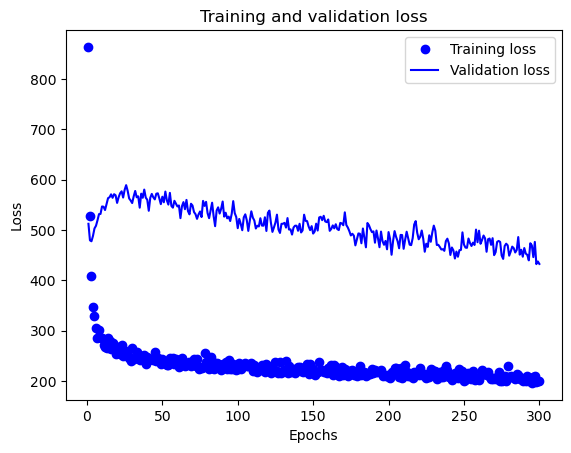

In [23]:
history_dict = history.history
mae = history_dict['mae']

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

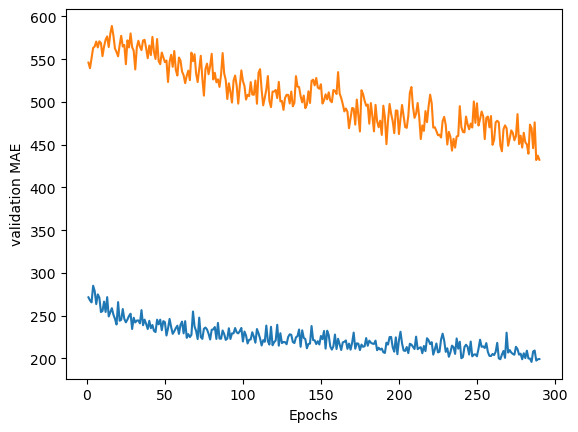

In [24]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

truncated_loss_values = loss_values[10:]
truncated_val_loss_values = val_loss_values[10:]

plt.plot(range(1, len(truncated_loss_values) + 1), truncated_loss_values)
plt.plot(range(1, len(truncated_val_loss_values) + 1), truncated_val_loss_values)
plt.xlabel("Epochs")
plt.ylabel("validation MAE")
plt.show()

In [25]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 2578.1565 - mae: 42.1617


In [27]:
test_mse_score, test_mae_score

(2578.156494140625, 42.16168975830078)

# CNN

In [54]:
X_data = df.drop(['Pulse'], axis = 1)
y_data = df['Pulse']

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_data)
X_data = sc.fit_transform(X_data)

In [56]:
n_features = X_data.shape[1]
X_data = X_data.reshape((X_data.shape[0],1, n_features))

In [57]:
n_steps = X_data.shape[1]
n_steps

1

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [60]:
# Defining the model 
from keras import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
input_shape = input_shape=(n_steps, n_features)
inputs = Input(shape = input_shape)

CNN = Conv1D(filters=8, kernel_size=3, activation='relu', padding='same')(inputs)
#Maxpool = MaxPooling1D(pool_size=2)(CNN)

Flatten = Flatten()(CNN)
x = Dense(16,activation='relu')(Flatten)
x3 = Dense(16,activation='relu')(x)
outputs = Dense(1)(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile('rmsprop',
             loss = "mse",metrics=["mae"]
             )

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 8)              128       
                                                                 
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable param

In [61]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32,validation_data= (X_val,y_val))

Epoch 1/50
1/1 [==============================] - 1s 581ms/step - loss: 3062.0586 - mae: 55.0392 - val_loss: 3759.9629 - val_mae: 60.3727
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 3056.5920 - mae: 54.9886 - val_loss: 3756.8906 - val_mae: 60.3470
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 3052.6990 - mae: 54.9523 - val_loss: 3754.3682 - val_mae: 60.3259
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 3049.3630 - mae: 54.9213 - val_loss: 3751.6816 - val_mae: 60.3040
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 3046.1914 - mae: 54.8917 - val_loss: 3749.0869 - val_mae: 60.2830
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 3043.1921 - mae: 54.8637 - val_loss: 3746.5752 - val_mae: 60.2625
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 3040.2805 - mae: 54.8366 - val_loss: 3744.1270 - val_mae: 60.2427
Epoch 8/50
1/1 [========================

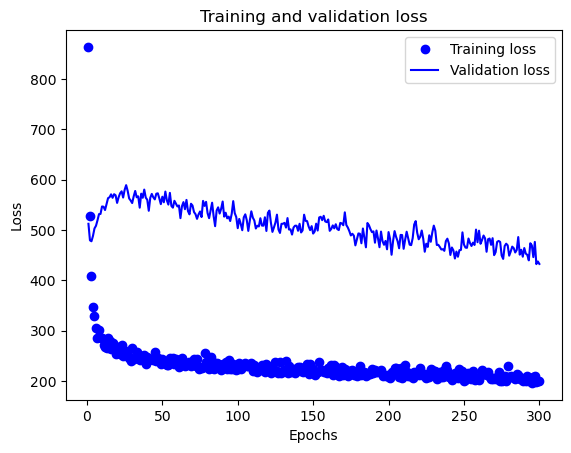

In [63]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

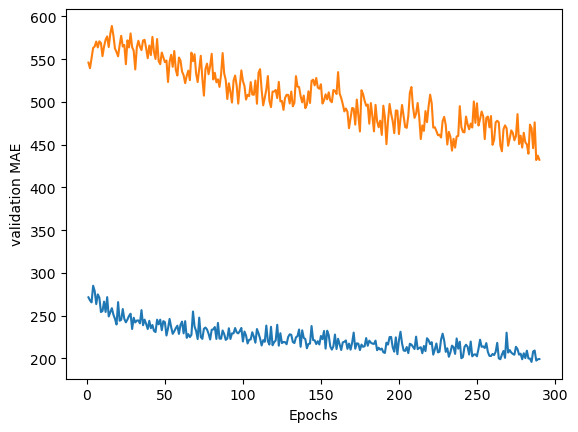

In [64]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

truncated_loss_values = loss_values[10:]
truncated_val_loss_values = val_loss_values[10:]

plt.plot(range(1, len(truncated_loss_values) + 1), truncated_loss_values)
plt.plot(range(1, len(truncated_val_loss_values) + 1), truncated_val_loss_values)
plt.xlabel("Epochs")
plt.ylabel("validation MAE")
plt.show()

In [45]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

test_mse_score, test_mae_score

1/1 [==============================] - 0s 24ms/step - loss: 3081.6470 - mae: 54.6781


(3081.64697265625, 54.678096771240234)

# LSTM

In [65]:
verbose = 1
batch_size = 32
epochs = 30

In [66]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers

In [67]:
input_shape=(n_steps, n_features)
model = Sequential()
model.add(LSTM(16, input_shape= input_shape))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile('rmsprop',
             loss = "mse",metrics=["mae"]
             )
    
 # fit network
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_val,y_val))

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 3064.0645 - mae: 55.0616 - val_loss: 3763.6387 - val_mae: 60.4017
Epoch 2/30
1/1 [==============================] - 0s 44ms/step - loss: 3063.6003 - mae: 55.0545 - val_loss: 3762.3459 - val_mae: 60.3909
Epoch 3/30
1/1 [==============================] - 0s 41ms/step - loss: 3064.0559 - mae: 55.0561 - val_loss: 3761.4087 - val_mae: 60.3830
Epoch 4/30
1/1 [==============================] - 0s 42ms/step - loss: 3057.5989 - mae: 55.0011 - val_loss: 3760.4971 - val_mae: 60.3752
Epoch 5/30
1/1 [==============================] - 0s 37ms/step - loss: 3058.1414 - mae: 55.0003 - val_loss: 3759.6772 - val_mae: 60.3685
Epoch 6/30
1/1 [==============================] - 0s 36ms/step - loss: 3053.2051 - mae: 54.9632 - val_loss: 3758.9814 - val_mae: 60.3625
Epoch 7/30
1/1 [==============================] - 0s 60ms/step - loss: 3056.3047 - mae: 54.9894 - val_loss: 3758.3408 - val_mae: 60.3569
Epoch 8/30
1/1 [===========================

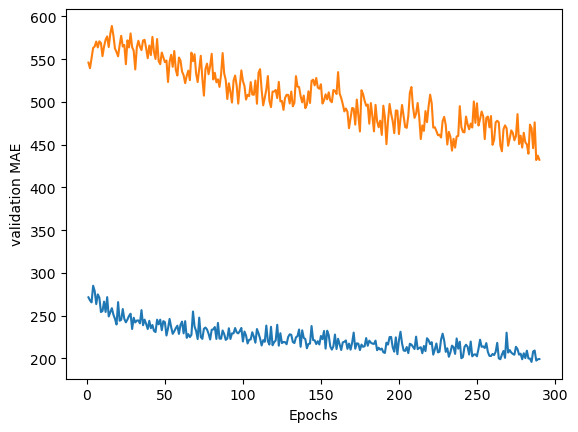

In [68]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

truncated_loss_values = loss_values[10:]
truncated_val_loss_values = val_loss_values[10:]

plt.plot(range(1, len(truncated_loss_values) + 1), truncated_loss_values)
plt.plot(range(1, len(truncated_val_loss_values) + 1), truncated_val_loss_values)
plt.xlabel("Epochs")
plt.ylabel("validation MAE")
plt.show()

In [71]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

test_mse_score, test_mae_score

1/1 [==============================] - 0s 27ms/step - loss: 2956.8313 - mae: 54.2733


(2956.831298828125, 54.2733268737793)